In [1]:
import subprocess
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
# import CANN, extract_vtu_data
from CANN import CANN, BoundaryLayerDataset, custom_collate_fn, pad_sequence
from extract_vtu_data import extract_vtu_data
from eval_velocity import return_velocity
from extract_comp_info import extract_farfield_conditions
import torch
import datetime
import pickle

/home/yiren/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Import data

In [33]:
def apply_masks_to_model(model, state_dict):
    for name, param in model.named_parameters():
        # Assuming the mask's key follows a specific naming convention, e.g., 'weight_mask' for 'weight'
        mask_key = name + '_mask'
        if mask_key in state_dict:
            mask = state_dict[mask_key]
            # Ensure mask is the same device and dtype as param
            mask = mask.to(device=param.device, dtype=param.dtype)
            # Apply mask
            param.data.mul_(mask)


In [17]:
with open('input_data.pkl', 'rb') as f:
    data = pickle.load(f)
print(len(data))    
dataset = BoundaryLayerDataset(data)
print(dataset)

seed = 42
np.random.seed(seed)
print(np.random.choice(len(dataset), 10)) # test if index is fixed

1632
[1126 1459  860 1294 1130 1095 1044  121  466 1238]


# Model 20240313-003320

In [19]:
model_path = 'trained_model/trained_model_20240313-003320.pth'
num_cv_folds = 9
epochs = 5000
learning_rate = 10e-1
step_size = 500
gamma = 0.9
prune_iter = 500
to_prune = True
alpha=20e-3
beta = 1
prune_threshold_min=1e-3
prune_threshold_max=1e2


model = CANN(alpha=alpha, beta=beta, prune_threshold_min=prune_threshold_min, prune_threshold_max=prune_threshold_max)
model.load_state_dict(torch.load(model_path))




# randomly select some 5 data from the dataset to evaluate the model
num_data = 5
random_indices = np.random.choice(len(dataset), num_data, replace=False)
for idx in random_indices:
    re_x, dp_dx, mach, pr_lam, eta, u = dataset[idx]
    predicted_dy_deta = model.eval_prediction(re_x, dp_dx, mach, pr_lam, torch.tensor(eta, dtype=torch.float32).unsqueeze(0))
    plt.plot(u, eta, label=f"Ma={mach}", linestyle='--')
    plt.plot(predicted_dy_deta.cpu().detach().numpy().squeeze(), eta, label=f"Ma={mach}", linestyle='-')
plt.xlabel('$\eta$')
plt.ylabel('$u$')
plt.legend()
plt.show()    

RuntimeError: Error(s) in loading state_dict for CANN:
	Missing key(s) in state_dict: "network.1.weight", "network.1.bias", "network.3.weight", "network.3.bias", "network.4.weight", "network.4.bias". 
	Unexpected key(s) in state_dict: "network.1.weight_orig", "network.1.bias_orig", "network.1.weight_mask", "network.1.bias_mask", "network.3.weight_orig", "network.3.bias_orig", "network.3.weight_mask", "network.3.bias_mask". 

# Model 20240313-012125

In [18]:
model_path = 'trained_model/trained_model_20240313-012125.pth'
num_cv_folds = 9
epochs = 5000
learning_rate = 10e-1
step_size = 500
gamma = 0.9
prune_iter = 500
to_prune = True
alpha=20e-3
beta = 1
prune_threshold_min=1e-3
prune_threshold_max=1e2

model = CANN(alpha=alpha, beta=beta, prune_threshold_min=prune_threshold_min, prune_threshold_max=prune_threshold_max)
model.load_state_dict(torch.load(model_path))



# randomly select some 5 data from the dataset to evaluate the model
num_data = 10
random_indices = np.random.choice(len(dataset), num_data, replace=False)
for idx in random_indices:
    re_x, dp_dx, mach, pr_lam, eta, u = dataset[idx]
    predicted_dy_deta = model.eval_prediction(re_x, dp_dx, mach, pr_lam, torch.tensor(eta, dtype=torch.float32).unsqueeze(0))
    plt.plot(u, eta, label=f"Ma={mach}", linestyle='--')
    plt.plot(predicted_dy_deta.cpu().detach().numpy().squeeze(), eta, label=f"Ma={mach}", linestyle='-')
plt.xlabel('$\eta$')
plt.ylabel('$u$')
plt.legend()
plt.show()  

RuntimeError: Error(s) in loading state_dict for CANN:
	Missing key(s) in state_dict: "network.1.weight", "network.1.bias", "network.3.weight", "network.3.bias", "network.4.weight", "network.4.bias". 
	Unexpected key(s) in state_dict: "network.1.weight_orig", "network.1.bias_orig", "network.1.weight_mask", "network.1.bias_mask", "network.3.weight_orig", "network.3.bias_orig", "network.3.weight_mask", "network.3.bias_mask", "network.4.weight_orig", "network.4.bias_orig", "network.4.weight_mask", "network.4.bias_mask". 

# Model 20240313021258

([array([[ 0., -0.,  0., ..., -0., -0., -0.],
       [-0.,  0., -0., ..., -0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., -0.],
       ...,
       [ 0.,  0., -0., ..., -0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0.,  0.]], dtype=float32), array([[-0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.        , -0.        , -0.        ,
         0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        -0.        ,  0.        ,  0.        , -0.        , -0.        ,
         0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        ,  0.        ],
       [ 0.        ,  0.        , -0.        , -0.        , -0.        ,
        -0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        , -0.        ,
         0.  

/tmp/ipykernel_45595/3710935421.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_dy_deta = model.eval_prediction(re_x, dp_dx, mach, pr_lam, torch.tensor(eta, dtype=torch.float32).unsqueeze(0))
/home/yiren/Desktop/blasius_ANN/CANN.py:241: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Re_x = torch.tensor(Re_x, dtype=torch.float32).unsqueeze(0)
/home/yiren/Desktop/blasius_ANN/CANN.py:242: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dp_dx = torch.tensor(dp_dx, dtype=torch.float32).unsqueeze(0)
/home/yiren/Desktop/blasius_ANN/C

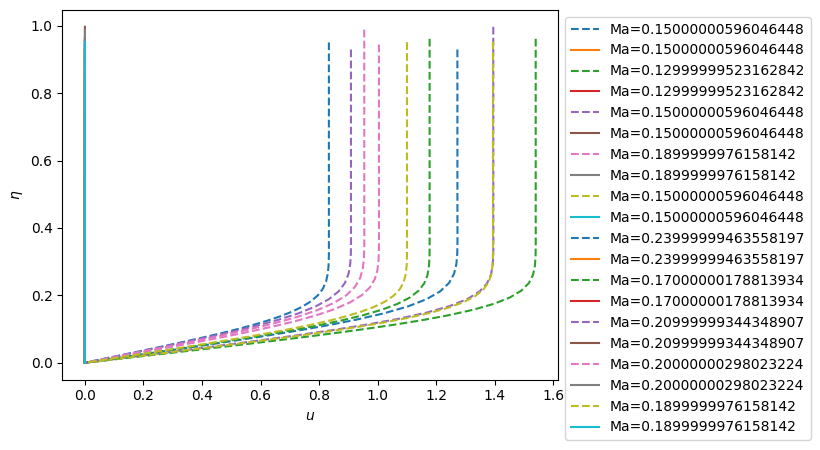

In [31]:




model_path = 'trained_model/trained_model_20240313-021258.pth'
num_cv_folds = 9
epochs = 5000
learning_rate = 10e-1
step_size = 500
gamma = 0.9
prune_iter = 500
to_prune = True
alpha=20e-3
beta = 1
prune_threshold_min=1e-3
prune_threshold_max=1e2

model = CANN(alpha=alpha, beta=beta, prune_threshold_min=prune_threshold_min, prune_threshold_max=prune_threshold_max)

# Load the original state_dict with masks
state_dict = torch.load(model_path)

# Load state_dict into model (you might need to adjust the keys as mentioned earlier)
model.load_state_dict(state_dict, strict=False)  # 'strict=False' allows ignoring unmatched keys

# Apply masks to zero out pruned weights
apply_masks_to_model(model, state_dict)

print(model.get_weights())

# randomly select some 5 data from the dataset to evaluate the model
num_data = 10
random_indices = np.random.choice(len(dataset), num_data, replace=False)
for idx in random_indices:
    ff_conditions, eta, u = dataset[idx]
    re_x, dp_dx, mach, pr_lam = ff_conditions
    predicted_dy_deta = model.eval_prediction(re_x, dp_dx, mach, pr_lam, torch.tensor(eta, dtype=torch.float32).unsqueeze(0))
    print('u')
    print(u)
    print('u_pred')
    print(predicted_dy_deta.cpu().detach().numpy().squeeze())
    print('eta')
    print(eta)
    plt.plot(u, eta, label=f"Ma={mach}", linestyle='--')
    plt.plot(predicted_dy_deta.cpu().detach().numpy().squeeze(), eta, label=f"Ma={mach}", linestyle='-')
plt.xlabel('$u$')
plt.ylabel('$\eta$')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()  